<a href="https://colab.research.google.com/github/starhou/Algorithm/blob/master/ML/GAN%E7%90%86%E8%AE%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#对抗生成网络

 [ref.GAN](http://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf)
 [ref.WGAN](https://arxiv.xilesou.top/pdf/1701.07875.pdf)
 [ref.郑华滨知乎博客](https://zhuanlan.zhihu.com/p/25071913)
 [ref.WGAN-GP](http://papers.nips.cc/paper/7159-improved-training-of-wasserstein-gans.pdf)




GAN的目标函数是

$$\min _{G} \max _{D} V(D, G)=\mathbb{E}_{\boldsymbol{x} \sim p_{\text {data }}(\boldsymbol{x})}[\log D(\boldsymbol{x})]+\mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}(\boldsymbol{z})}[\log (1-D(G(\boldsymbol{z})))].....(1)$$

分析目标函数，其中对判别器$D$，其目标函数是：$E_{r}[logD(x)]+E_{g}[log(1-D(G(z))]$，对生成器G，其目标函数是：$E_{g}[log(1-D(G(z))]$。

对判别器，一个样本的损失函数是
$$
-P_{r}(x) \log D(x)-P_{g}(x) \log [1-D(x)].....(2)
$$

首先最大化D(x)，对D(x)求导，得到$$D^{*}(x)=\frac{P_{r}(x)}{P_{r}(x)+P_{g}(x)}.....(3)$$

其含义是，最优判别器$D^{*}(x)$可以准确给出输入样本中真实样本所占的比例。把(3)带入判别器的损失函数(2)，得到

$$\mathbb{E}_{x \sim P_{r}} \log \frac{P_{r}(x)}{\frac{1}{2}\left[P_{r}(x)+P_{g}(x)\right]}+\mathbb{E}_{x \sim P_{g}} \log \frac{P_{g}(x)}{\frac{1}{2}\left[P_{r}(x)+P_{g}(x)\right]}-2 \log 2.....(4)(a)$$

即为2倍JS散度，
$$
2 J S\left(P_{r} \| P_{g}\right)-2 \log 2.....(4)(b)
$$

原始GAN的损失函数是JS散度，对JS散度，当两个分布是不相交时，JS散度恒为为$log2$，如图1，对毫不重合的两个分布，JS散度为log2（[证明](https://blog.csdn.net/Invokar/article/details/88917214)）



The Total Variation (TV) distance
$$\delta\left(\mathbb{P}_{r}, \mathbb{P}_{g}\right)=\sup _{A \in \Sigma}\left|\mathbb{P}_{r}(A)-\mathbb{P}_{g}(A)\right|$$

The Kullback-Leibler (KL) divergence
$$K L\left(\mathbb{P}_{r} \| \mathbb{P}_{g}\right)=\int \log \left(\frac{P_{r}(x)}{P_{g}(x)}\right) P_{r}(x) d \mu(x)$$

The Jensen-Shannon (JS) divergence
$$J S\left(\mathbb{P}_{r}, \mathbb{P}_{g}\right)=K L\left(\mathbb{P}_{r} \| \mathbb{P}_{m}\right)+K L\left(\mathbb{P}_{g} \| \mathbb{P}_{m}\right)$$

其中$\mathbb{P}_{m} = \left(\mathbb{P}_{r}+\mathbb{P}_{g}\right) / 2$

The Earth-Mover (EM) distance or Wasserstein-1
$$
W\left(\mathbb{P}_{r}, \mathbb{P}_{g}\right)=\inf _{\gamma \in \Pi\left(\mathbb{P}_{r}, \mathbb{P}_{g}\right)} \mathbb{E}_{(x, y) \sim \gamma}[\|x-y\|]
$$

对图1的分布，三种不同距离分别为，前两种距离不连续

$\cdot W\left(\mathbb{P}_{0}, \mathbb{P}_{\theta}\right)=|\theta|$

$\cdot J S\left(\mathbb{P}_{0}, \mathbb{P}_{\theta}\right)=\left\{\begin{array}{ll}\log 2 & \text { if } \theta \neq 0 \\ 0 & \text { if } \theta=0\end{array}\right.$

$\cdot K L\left(\mathbb{P}_{\theta} \| \mathbb{P}_{0}\right)=K L\left(\mathbb{P}_{0} \| \mathbb{P}_{\theta}\right)=\left\{\begin{array}{ll}+\infty & \text { if } \theta \neq 0 \\ 0 & \text { if } \theta=0\end{array}\right.$

由于推图机距离是计算下确界$inf$，很难计算，根据Kantorovich-Rubinstein duality，具体计算，推土机距离满足下式
$$
W\left(\mathbb{P}_{r}, \mathbb{P}_{\theta}\right)=\sup _{\|f\|_{L} \leq 1} \mathbb{E}_{x \sim \mathbb{P}_{r}}[f(x)]-\mathbb{E}_{x \sim \mathbb{P}_{\theta}}[f(x)]
$$
WGAN算法：
![](https://cdn.mathpix.com/snip/images/rMY6eF1AncGDOtt-U7X71q1H4yhqApnGsgQPk1OWS5M.original.fullsize.png)

WGAN算法有一个混合真实样本和生成样本的步骤，判别器损失和原始GAN相同，生成器损失变为推土机距离。

对WGAN-GP, WGAN对权值裁剪，WGAN-GP对梯度进行裁剪。原文中提到了一些梯度裁剪的好处如下

```
Gradient norms of deep WGAN critics during training on 
toy datasets either explode or vanish when using weight 
clipping, but not when using a gradient penalty. (right) 
Weight clipping (top) pushes weights towards two values 
(the extremes of the clipping range), unlike gradient 
penalty (bottom).
```
WGAN-GP的算法如下：
![](https://cdn.mathpix.com/snip/images/R1aey4DNXGztq4x9Fv-yGEuprtZ6ZCcNgR48660NR9s.original.fullsize.png)




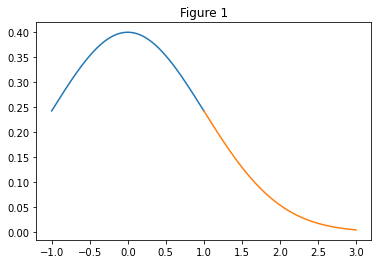

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
mu = 0
sd = 1
t1 = np.linspace(-1,1,1000)
t2 = np.linspace(1,3,1000)
y1 = stats.norm(mu, sd).pdf(t1)
y2 = stats.norm(mu, sd).pdf(t2)



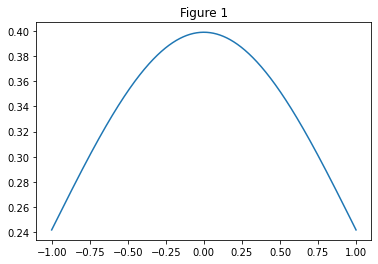

In [4]:
plt.figure(1)
plt.plot(t1,y1)
plt.title("Figure 1")
plt.show()